# RFM Analysis

RFM analysis is a powerful technique used by companies to better understand customer behaviour and optimize engagement strategies. It revolves around three key dimensions: recency, frequency, and monetary value. These dimensions capture essential aspects of customer transactions, providing valuable information for segmentation and personalized marketing campaigns.

In [2]:
import pandas as pd
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default = "plotly_white"


In [3]:
rfm=pd.read_csv(r'C:\Users\femif\Downloads\rfm_data.csv')
rfm

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location
0,8814,2023-04-11,943.31,Product C,890075,Tokyo
1,2188,2023-04-11,463.70,Product A,176819,London
2,4608,2023-04-11,80.28,Product A,340062,New York
3,2559,2023-04-11,221.29,Product A,239145,London
4,9482,2023-04-11,739.56,Product A,194545,Paris
...,...,...,...,...,...,...
995,2970,2023-06-10,759.62,Product B,275284,London
996,6669,2023-06-10,941.50,Product C,987025,New York
997,8836,2023-06-10,545.36,Product C,512842,London
998,1440,2023-06-10,729.94,Product B,559753,Paris


In [4]:
#Display firts few rows of the data
rfm.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location
0,8814,2023-04-11,943.31,Product C,890075,Tokyo
1,2188,2023-04-11,463.70,Product A,176819,London
2,4608,2023-04-11,80.28,Product A,340062,New York
3,2559,2023-04-11,221.29,Product A,239145,London
4,9482,2023-04-11,739.56,Product A,194545,Paris


In [5]:
#information about the data
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerID          1000 non-null   int64  
 1   PurchaseDate        1000 non-null   object 
 2   TransactionAmount   1000 non-null   float64
 3   ProductInformation  1000 non-null   object 
 4   OrderID             1000 non-null   int64  
 5   Location            1000 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 47.0+ KB


In [6]:
#check the null values
rfm.isnull().sum ()

CustomerID            0
PurchaseDate          0
TransactionAmount     0
ProductInformation    0
OrderID               0
Location              0
dtype: int64

In [7]:
#descriptive statistics
rfm.describe()

,CustomerID,TransactionAmount,OrderID
count,1000.000000,1000.00000,1000.000000
mean,5554.789000,513.67781,554071.398000
std,2605.014863,286.09870,264695.448814
min,1011.000000,12.13000,100096.000000
25%,3273.000000,257.12000,313152.000000
50%,5538.000000,523.56500,564671.500000
75%,7821.750000,759.86000,783052.250000
max,9991.000000,999.44000,999695.000000


In [10]:
#display the rows and columns of the data
rfm.shape

(1000, 6)

### calculating RFM values

In [14]:
rfm['PurchaseDate'] = pd.to_datetime(rfm['PurchaseDate'])

# Calculate Recency, Frequency, and Monetary values
current_date = pd.to_datetime('today')  # You can use the current date or the latest date in your dataset
rfm['Recency'] = current_date - rfm.groupby('CustomerID')['PurchaseDate'].transform('max')
rfm['Frequency'] = rfm.groupby('CustomerID')['PurchaseDate'].transform('count')
rfm['Monetary'] = rfm.groupby('CustomerID')['TransactionAmount'].transform('sum')

# Drop duplicate rows to keep only unique CustomerID values
rfm = rfm.drop_duplicates(subset=['CustomerID'])

# Display the RFM values
print(rfm[['CustomerID', 'Recency', 'Frequency', 'Monetary']].head())

   CustomerID                  Recency  Frequency  Monetary
0        8814 339 days 18:08:04.439306          1    943.31
1        2188 339 days 18:08:04.439306          1    463.70
2        4608 339 days 18:08:04.439306          1     80.28
3        2559 339 days 18:08:04.439306          1    221.29
4        9482 339 days 18:08:04.439306          1    739.56


Recency: Calculate how recently each customer made a purchase. This is usually measured as the difference between the current date and the date of the customer's most recent purchase.

Frequency: Calculate how often each customer makes purchases. This is typically measured as the total number of purchases made by the customer over a specific period.

Monetary: Calculate the total amount of money spent by each customer. This is usually measured as the sum of the purchase amounts made by the customer over a specific period.

In [15]:
rfm.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency,Monetary
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,339 days 18:08:04.439306,1,943.31
1,2188,2023-04-11,463.70,Product A,176819,London,339 days 18:08:04.439306,1,463.70
2,4608,2023-04-11,80.28,Product A,340062,New York,339 days 18:08:04.439306,1,80.28
3,2559,2023-04-11,221.29,Product A,239145,London,339 days 18:08:04.439306,1,221.29
4,9482,2023-04-11,739.56,Product A,194545,Paris,339 days 18:08:04.439306,1,739.56


Adding 3 columns Recency,Freqyency,Monitary

In [16]:
rfm['Monetary'].max()

2379.45

In [18]:
max_monetary_index = rfm['Monetary'].idxmax()


max_monetary_value = rfm.loc[max_monetary_index, 'Monetary']
max_monetary_date = rfm.loc[max_monetary_index, 'PurchaseDate']

print("Maximum Monetary Value:", max_monetary_value)
print("Corresponding Date:", max_monetary_date)


Maximum Monetary Value: 2379.45
Corresponding Date: 2023-04-14 00:00:00


In [20]:
min_monetary_index = rfm['Monetary'].idxmin()


min_monetary_value = rfm.loc[min_monetary_index, 'Monetary']
min_monetary_date = rfm.loc[min_monetary_index, 'PurchaseDate']

print("Minimum Monetary Value:", min_monetary_value)
print("Corresponding Date:", min_monetary_date)


Minimum Monetary Value: 12.13
Corresponding Date: 2023-05-05 00:00:00


#### Calculate quintiles for Recency, Frequency, and Monetary values

In [21]:
 
 
rfm['RecencyScore'] = pd.qcut(rfm['Recency'].rank(method='first'), q=5, labels=False, duplicates='drop')
rfm['FrequencyScore'] = pd.qcut(rfm['Frequency'], q=5, labels=False, duplicates='drop')
rfm['MonetaryScore'] = pd.qcut(rfm['Monetary'], q=5, labels=False, duplicates='drop')

# Calculate RFM score
rfm['RFM_Score'] = rfm['RecencyScore'] + rfm['FrequencyScore'] + rfm['MonetaryScore']

# Display the RFM scores
print(rfm[['CustomerID', 'RecencyScore', 'FrequencyScore', 'MonetaryScore', 'RFM_Score']].head())

   CustomerID  RecencyScore  FrequencyScore  MonetaryScore  RFM_Score
0        8814             4               0              4          8
1        2188             4               0              2          6
2        4608             4               0              0          4
3        2559             4               0              1          5
4        9482             4               0              3          7


C:\Users\femif\AppData\Local\Temp\ipykernel_1296\3902413194.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm['RecencyScore'] = pd.qcut(rfm['Recency'].rank(method='first'), q=5, labels=False, duplicates='drop')
C:\Users\femif\AppData\Local\Temp\ipykernel_1296\3902413194.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm['FrequencyScore'] = pd.qcut(rfm['Frequency'], q=5, labels=False, duplicates='drop')
C:\Users\femif\AppData\Local\Temp\ipykernel_1296\3902413194.py:3: SettingWithCopyWarning: 
A va

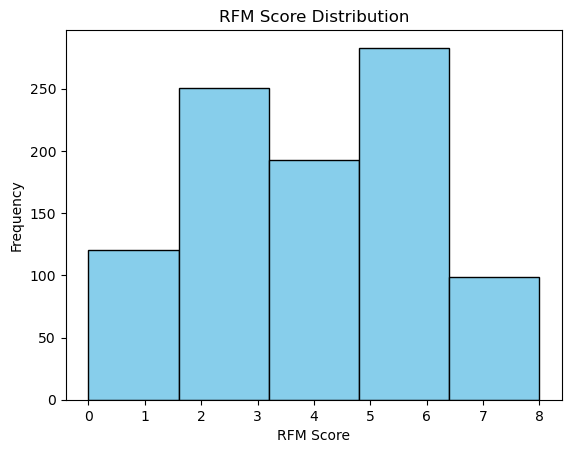

In [23]:
import matplotlib.pyplot as plt



# Plot histogram of RFM scores distribution
plt.hist(rfm['RFM_Score'], bins=5, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('RFM Score')
plt.ylabel('Frequency')
plt.title('RFM Score Distribution')

# Show the plot
plt.show()

highest RFM score is 8

In [25]:
# Convert RFM scores to numeric type
rfm['RecencyScore'] = rfm['RecencyScore'].astype(int)
rfm['FrequencyScore'] = rfm['FrequencyScore'].astype(int)
rfm['MonetaryScore'] = rfm['MonetaryScore'].astype(int)

C:\Users\femif\AppData\Local\Temp\ipykernel_1296\1442614058.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm['RecencyScore'] = rfm['RecencyScore'].astype(int)
C:\Users\femif\AppData\Local\Temp\ipykernel_1296\1442614058.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm['FrequencyScore'] = rfm['FrequencyScore'].astype(int)
C:\Users\femif\AppData\Local\Temp\ipykernel_1296\1442614058.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [26]:
rfm['RecencyScore'] = rfm['RecencyScore'].astype(int)

C:\Users\femif\AppData\Local\Temp\ipykernel_1296\3113078532.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm['RecencyScore'] = rfm['RecencyScore'].astype(int)


In [27]:
rfm['RecencyScore']

0      4
1      4
2      4
3      4
4      4
      ..
995    0
996    0
997    0
998    0
999    0
Name: RecencyScore, Length: 946, dtype: int32

In [33]:
# Calculate RFM score by combining the individual scores
rfm['RFM_Score'] = rfm['RecencyScore'] + rfm['FrequencyScore'] + rfm['MonetaryScore']

# Create RFM segments based on the RFM score
segment_labels = ['Low-Value', 'Mid-Value', 'High-Value']
rfm['Value Segment'] = pd.qcut(rfm['RFM_Score'], q=3, labels=segment_labels)

C:\Users\femif\AppData\Local\Temp\ipykernel_1296\250465228.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm['RFM_Score'] = rfm['RecencyScore'] + rfm['FrequencyScore'] + rfm['MonetaryScore']
C:\Users\femif\AppData\Local\Temp\ipykernel_1296\250465228.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm['Value Segment'] = pd.qcut(rfm['RFM_Score'], q=3, labels=segment_labels)


In [34]:
rfm['Value Segment']

0      High-Value
1      High-Value
2       Mid-Value
3       Mid-Value
4      High-Value
          ...    
995     Low-Value
996     Mid-Value
997     Low-Value
998     Low-Value
999     Low-Value
Name: Value Segment, Length: 946, dtype: category
Categories (3, object): ['Low-Value' < 'Mid-Value' < 'High-Value']

 we created RFM segments based on the scores. We divided RFM scores into three segments, namely “Low-Value”, “Mid-Value”, and “High-Value”. Segmentation is done using the pd.qcut() function, which evenly distributes scores between segments.

In [35]:
rfm.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score,Value Segment
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,339 days 18:08:04.439306,1,943.31,4,0,4,8,High-Value
1,2188,2023-04-11,463.70,Product A,176819,London,339 days 18:08:04.439306,1,463.70,4,0,2,6,High-Value
2,4608,2023-04-11,80.28,Product A,340062,New York,339 days 18:08:04.439306,1,80.28,4,0,0,4,Mid-Value
3,2559,2023-04-11,221.29,Product A,239145,London,339 days 18:08:04.439306,1,221.29,4,0,1,5,Mid-Value
4,9482,2023-04-11,739.56,Product A,194545,Paris,339 days 18:08:04.439306,1,739.56,4,0,3,7,High-Value


### segment distribution

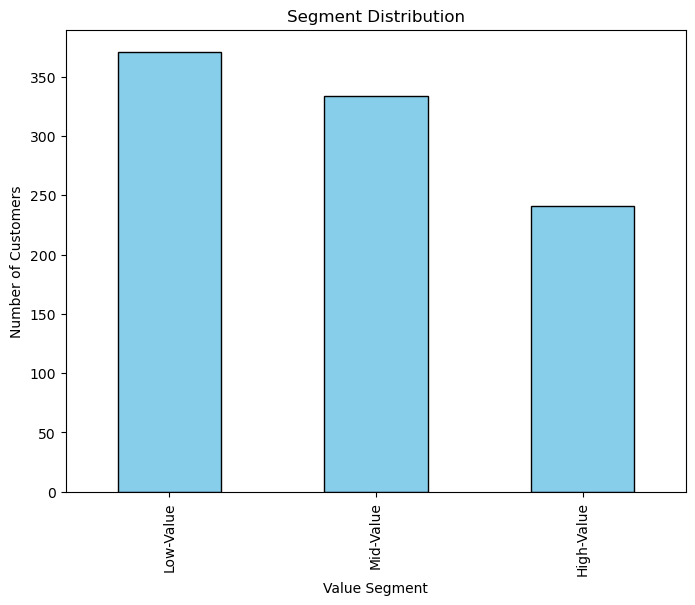

In [37]:
import matplotlib.pyplot as plt

# Count the number of customers in each value segment
segment_distribution = rfm['Value Segment'].value_counts()

# Plot the segment distribution
plt.figure(figsize=(8, 6))
segment_distribution.plot(kind='bar', color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Value Segment')
plt.ylabel('Number of Customers')
plt.title('Segment Distribution')

# Show the plot
plt.show()

we can see in this graph Low value segment has more number of customers

### RFM Customer Segments

In [48]:
rfm['RFM Customer Segments'] = ''

# Assign RFM segments based on the RFM score
rfm.loc[rfm['RFM_Score'] >= 9, 'RFM Customer Segments'] = 'Champions'
rfm.loc[(rfm['RFM_Score'] >= 6) & (rfm['RFM_Score'] < 9), 'RFM Customer Segments'] = 'Potential Loyalists'
rfm.loc[(rfm['RFM_Score'] >= 5) & (rfm['RFM_Score'] < 6), 'RFM Customer Segments'] = 'At Risk Customers'
rfm.loc[(rfm['RFM_Score'] >= 4) & (rfm['RFM_Score'] < 5), 'RFM Customer Segments'] = "Can't Lose"
rfm.loc[(rfm['RFM_Score'] >= 3) & (rfm['RFM_Score'] < 4), 'RFM Customer Segments'] = "Lost"

# Print the updated data with RFM segments
print(rfm[['CustomerID', 'RFM Customer Segments']])

     CustomerID RFM Customer Segments
0          8814   Potential Loyalists
1          2188   Potential Loyalists
2          4608            Can't Lose
3          2559     At Risk Customers
4          9482   Potential Loyalists
..          ...                   ...
995        2970                  Lost
996        6669            Can't Lose
997        8836                      
998        1440                  Lost
999        4759                  Lost

[946 rows x 2 columns]


C:\Users\femif\AppData\Local\Temp\ipykernel_1296\3746564309.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm['RFM Customer Segments'] = ''


High-Value Customers: Customers with high recency, frequency, and monetary values. These are your most valuable customers who have made recent purchases frequently and spent a significant amount of money.

Mid-Value Customers: Customers with moderate recency, frequency, and monetary values. They may not be as active as high-value customers but still contribute significantly to your revenue.

Low-Value Customers: Customers with low recency, frequency, and monetary values. These customers may have made only a few purchases, spent less money, or not purchased recently.

Potential Loyalists: Customers with high frequency but low recency and monetary values. These customers may have made frequent purchases in the past but haven't purchased recently. They have the potential to become high-value customers if re-engaged effectively.

At-Risk Customers: Customers with high recency but low frequency and monetary values. These customers may have made recent purchases but not frequently or spent much. They may be losing interest in your products or services and need attention to prevent churn.

Lost Customers: Customers with low recency, frequency, and monetary values. These customers haven't made purchases recently and may have been inactive for a long time. They may require reactivation efforts to win them back.



# RFM Analysis

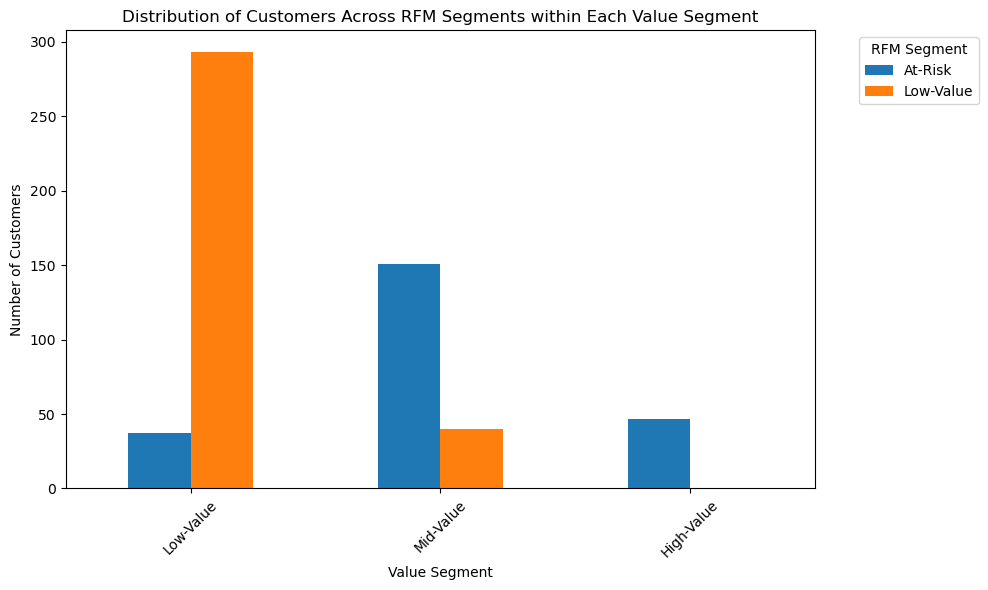

In [43]:
segment_distribution = rfm.groupby(['Value Segment', 'Segment']).size().unstack()

# Plot the grouped bar plot
segment_distribution.plot(kind='bar', figsize=(10, 6))

# Add labels and title
plt.xlabel('Value Segment')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customers Across RFM Segments within Each Value Segment')

# Show the plot
plt.legend(title='RFM Segment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Analyze the correlation of the recency, frequency, and monetary scores

Correlation Matrix:
                RecencyScore  FrequencyScore  MonetaryScore
RecencyScore        1.000000             NaN      -0.025873
FrequencyScore           NaN             NaN            NaN
MonetaryScore      -0.025873             NaN       1.000000


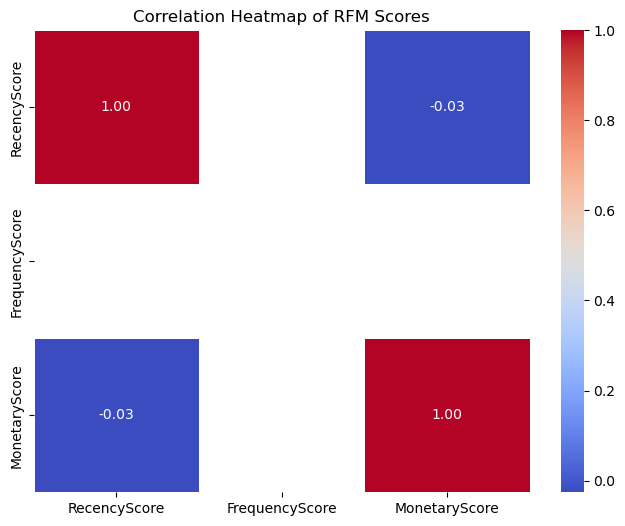

In [54]:
rfm_corr = rfm[['RecencyScore', 'FrequencyScore', 'MonetaryScore']].corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(rfm_corr)

# Visualize the correlation matrix as a heatmap
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(rfm_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of RFM Scores')
plt.show()

This analysis will help you understand how recency, frequency, and monetary scores are related to each other. Positive correlations indicate that higher scores in one variable tend to be associated with higher scores in another variable, while negative correlations indicate an inverse relationship. 